In [2]:
import pandas as pd
import category_encoders as ce
from sklearn import preprocessing
from  sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import SelectKBest, mutual_info_classif
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

In [3]:
Train_data =pd.read_csv("Data/traindata.csv")
X_test=pd.read_csv("Data/testdata.csv")

In [4]:
Train_data.head(5)

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,0,tcp,http,SF,295,2584,0,0,0,...,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,1,0,tcp,http,SF,312,839,0,0,0,...,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,2,0,tcp,ftp,SF,1225,2451,0,0,0,...,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,3,0,tcp,http,SF,293,296,0,0,0,...,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,4,0,tcp,X11,REJ,0,0,0,0,0,...,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0


In [5]:
Train_data.shape

(23002, 44)

In [6]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           23002 non-null  int64  
 1   duration                     23002 non-null  int64  
 2   protocol_type                23002 non-null  object 
 3   service                      23002 non-null  object 
 4   flag                         23002 non-null  object 
 5   src_bytes                    23002 non-null  int64  
 6   dst_bytes                    23002 non-null  int64  
 7   land                         23002 non-null  int64  
 8   wrong_fragment               23002 non-null  int64  
 9   urgent                       23002 non-null  int64  
 10  hot                          23002 non-null  int64  
 11  num_failed_logins            23002 non-null  int64  
 12  logged_in                    23002 non-null  int64  
 13  num_compromised 

In [7]:
Train_data.duplicated().sum()

0

In [8]:
Train_data["Class"].value_counts()

Class
0    12001
1    11001
Name: count, dtype: int64

# Test Data

In [9]:
X_test.shape

(22501, 43)

In [10]:
X_test.head(5)

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,4,tcp,pop_3,SF,30,93,0,0,0,...,232,0.91,0.04,0.00,0.00,0.0,0.0,0.0,0.0,16
1,1,0,tcp,private,S0,0,0,0,0,0,...,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,21
2,2,0,udp,private,SF,52,54,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,17
3,3,0,tcp,http,SF,367,588,0,0,0,...,255,1.00,0.00,0.12,0.06,0.0,0.0,0.0,0.0,21
4,4,0,icmp,ecr_i,SF,1008,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18


# Label Encoding

In [11]:
encoder_protocol_type = preprocessing.LabelEncoder()

Train_data['protocol_type']= encoder_protocol_type.fit_transform(Train_data['protocol_type'])
X_test['protocol_type']= encoder_protocol_type.transform(X_test['protocol_type'])

In [12]:
X_test.drop(columns=['service'],inplace=True)
Train_data.drop(columns=['service'],inplace=True)

In [14]:
encoder_flag = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
Train_data['flag']= encoder_flag.fit_transform(Train_data['flag'])
X_test['flag']= encoder_flag.transform(X_test['flag'])

In [15]:
y=Train_data["Class"]
x=Train_data.iloc[:, :-1]

In [16]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(18401, 42)

# Filter Selection using SelectKBest with f_classif

In [18]:
def Cal_F1_scoure(y_test,y_Test_pred):
    cm = confusion_matrix(y_test,y_Test_pred)
    true_positive = cm[1, 1]
    false_positive = cm[0, 1]
    false_negative = cm[1, 0]
    true_negative = cm[0, 0]

    return (2 * true_positive / (2 * true_positive + false_positive + false_negative))

In [19]:
def select_feature(X_train, y_train,X_validation , FSM):
    fs = FSM
    fs.fit(X_train, y_train)
    X_train_new = fs.transform(X_train)

    X_validation_new = fs.transform(X_validation)

    feature_indices = fs.get_support(indices=True)


    return X_train_new,X_validation_new,feature_indices

In [20]:
acc_dict_DT_validation = {}

feature_indices_dict={}

In [22]:
CB_model=CatBoostClassifier(random_seed=42 ,l2_leaf_reg=9, learning_rate=0.1, depth=10,verbose=0)

In [23]:
for k in range(1, 28):

    # Filter method: Information Gain
    fsm = SelectKBest(score_func=f_classif, k=k)

    X_train_new_SBest,X_validation_new_SBest,feature_indices = select_feature(X_train, y_train, X_val, fsm)
    feature_indices_dict[k]=feature_indices


    # tree

    CB_model.fit(X_train_new_SBest, y_train)
    y_validation_pred_DT = CB_model.predict(X_validation_new_SBest)
    acc_dict_DT_validation[k]=Cal_F1_scoure(y_val,y_validation_pred_DT)



C:\Users\DEBI\anaconda3\envs\My_Env_3.9\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\DEBI\anaconda3\envs\My_Env_3.9\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\DEBI\anaconda3\envs\My_Env_3.9\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\DEBI\anaconda3\envs\My_Env_3.9\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\DEBI\anaconda3\envs\My_Env_3.9\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [19 20] are constant

# plot Feature Selection with f_classif Method With CatBoostClassifier

In [34]:
def Draw_plots(acc_list, Title=None):
    fig = plt.figure()  # Create a new figure
    plt.plot(*zip(*sorted(acc_list.items())))
    # plt.axhline(y=baseline_accuracy, color='r', linestyle='--', label=f'Baseline Accuracy {baseline_accuracy:.3f}')
    plt.legend()
    # Title = "Feature Selection with Information Gain Method"
    plt.title(Title, fontsize=16)
    plt.xlabel("Number of Features", fontsize=16)
    plt.ylabel("Accuracy", fontsize=16)
    plt.show()
    print("Maximum accuracy:", max(acc_list.values()))
    print("Best number of features:", max(acc_list, key=acc_list.get))
    plt.show()
    return   max(acc_list, key=acc_list.get)
    # plt.close(fig)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


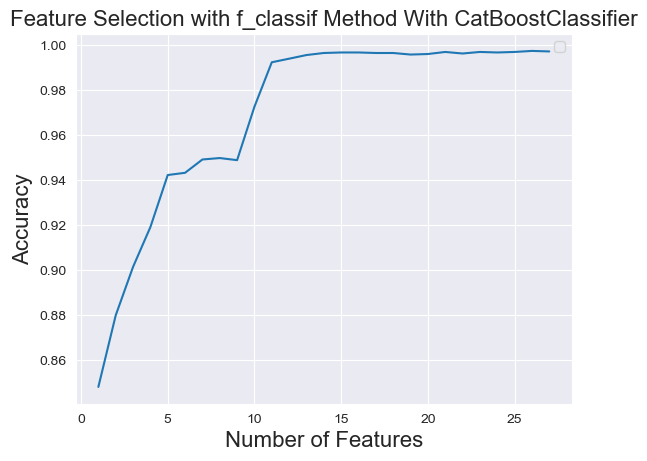

Maximum accuracy: 0.9974718455527465
Best number of features: 26


In [36]:
Max_DT_test=Draw_plots(acc_dict_DT_validation,"Feature Selection with f_classif Method With CatBoostClassifier")

#  select the best feature from  data after get the best indices from Feature selection

In [30]:
def find_list_with_length(feature_indices_dict,desired_length,Data):

    new_features = feature_indices_dict.get(desired_length, None)
    if new_features is not None:
        new_X_train = Data.iloc[:, new_features]
        return new_X_train
    else:
        # Handle the case when the desired_length is not found in the dictionary
        print(f"No list with length {desired_length} found in the dictionary.")
        return None

In [31]:
X_train_new=find_list_with_length(feature_indices_dict,Max_DT_test,X_train)

X_Validation_new=find_list_with_length(feature_indices_dict,Max_DT_test,X_val)
X_test_new=find_list_with_length(feature_indices_dict,Max_DT_test,X_test)

X_Validation_new

,duration,protocol_type,flag,wrong_fragment,logged_in,num_access_files,is_guest_login,count,serror_rate,srv_serror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
14905,0,2,9,0,0,0,0,112,0.00,0.0,...,223,0.87,0.01,0.00,0.00,0.00,0.00,0.00,0.0,20
3470,0,1,6,0,1,0,0,2,0.50,0.5,...,255,1.00,0.00,0.50,0.02,0.50,0.01,0.00,0.0,18
16816,0,1,9,0,1,0,0,1,0.00,0.0,...,203,0.79,0.04,0.01,0.01,0.00,0.00,0.00,0.0,21
7660,0,1,9,0,1,0,0,24,0.00,0.0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,21
12063,0,1,5,0,0,0,0,111,1.00,1.0,...,6,0.50,0.33,0.08,0.00,1.00,1.00,0.00,0.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,10,1,9,0,1,0,0,1,0.00,0.0,...,142,0.56,0.03,0.00,0.00,0.00,0.00,0.00,0.0,21
16861,0,1,1,0,0,0,0,510,0.13,0.0,...,1,0.00,1.00,0.00,0.00,0.10,0.00,0.90,1.0,20
10254,0,1,9,0,1,0,0,10,0.00,0.0,...,255,1.00,0.00,0.01,0.02,0.01,0.01,0.00,0.0,21
12837,0,1,2,0,0,0,0,162,0.00,0.0,...,18,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.0,21


# apply the CatBoostClassifier on the new  X_train_new and X_test_new

In [32]:
Cat_model = CatBoostClassifier(random_seed=42 ,l2_leaf_reg=9, learning_rate=0.1, depth=10,verbose=0)
Cat_model.fit(X_train_new,y_train)
Cat_val_y_pred=Cat_model.predict(X_Validation_new)

Cat_y_pred=Cat_model.predict(X_test_new)

In [33]:
OUTPUT_sample=pd.DataFrame({"Class":Cat_y_pred})
OUTPUT_sample=OUTPUT_sample.rename_axis("ID")
OUTPUT_sample
OUTPUT_sample.to_csv("sampleSubmission_Model_4.csv")